## Data Visualization with Pokemon.



## Importing libaries

In [134]:
# Import Libaries for data manipulation
import numpy as np
import pandas as pd

# Import Libaries for data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")


In [135]:
# Load data
Pokemon = pd.read_csv('Pokemon.csv')

## Variable description

In [136]:
# Data dimensions
print(f'Data dimensions: {Pokemon.shape}')

Data dimensions: (800, 13)


In [137]:
# See all the columns of the data set
Pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [138]:
# Creating a list with the columns
new_cols = ['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense','Speed','Sp. Atk', 'Sp. Def', 'Speed', 'Legendary', 'Generation', 'Total']

In [139]:
# Create a new data frame with new columns
data = pd.DataFrame(Pokemon, columns=new_cols)
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Sp. Atk,Sp. Def,Speed,Legendary,Generation,Total
0,Bulbasaur,Grass,Poison,45,49,49,45,65,65,45,False,1,318
1,Ivysaur,Grass,Poison,60,62,63,60,80,80,60,False,1,405
2,Venusaur,Grass,Poison,80,82,83,80,100,100,80,False,1,525
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,80,122,120,80,False,1,625
4,Charmander,Fire,NaN,39,52,43,65,60,50,65,False,1,309


In [140]:
# Set the name as index
data = data.set_index('Name')
data.head()

,Type 1,Type 2,HP,Attack,Defense,Speed,Sp. Atk,Sp. Def,Speed,Legendary,Generation,Total
Name,,,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,45,65,65,45,False,1,318
Ivysaur,Grass,Poison,60,62,63,60,80,80,60,False,1,405
Venusaur,Grass,Poison,80,82,83,80,100,100,80,False,1,525
VenusaurMega Venusaur,Grass,Poison,80,100,123,80,122,120,80,False,1,625
Charmander,Fire,NaN,39,52,43,65,60,50,65,False,1,309


In [141]:
# All the type of Pokemons
data['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

## Missing values

In [142]:
# Look for missing values
data.isnull().sum()

Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Speed           0
Sp. Atk         0
Sp. Def         0
Speed           0
Legendary       0
Generation      0
Total           0
dtype: int64

In [143]:
# Fill the missing values
data.fillna('No', inplace=True)
data.head(5)

,Type 1,Type 2,HP,Attack,Defense,Speed,Sp. Atk,Sp. Def,Speed,Legendary,Generation,Total
Name,,,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,45,65,65,45,False,1,318
Ivysaur,Grass,Poison,60,62,63,60,80,80,60,False,1,405
Venusaur,Grass,Poison,80,82,83,80,100,100,80,False,1,525
VenusaurMega Venusaur,Grass,Poison,80,100,123,80,122,120,80,False,1,625
Charmander,Fire,No,39,52,43,65,60,50,65,False,1,309


## Droping Features

In [144]:
# Drop columns
data.drop(columns=['Sp. Atk', 'Sp. Def', 'Speed'],inplace=True, axis=1)
data.head()

,Type 1,Type 2,HP,Attack,Defense,Legendary,Generation,Total
Name,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,False,1,318
Ivysaur,Grass,Poison,60,62,63,False,1,405
Venusaur,Grass,Poison,80,82,83,False,1,525
VenusaurMega Venusaur,Grass,Poison,80,100,123,False,1,625
Charmander,Fire,No,39,52,43,False,1,309


In [145]:
# New dataframe called with all the features
clean_data = pd.DataFrame(data, columns = data.columns)
clean_data.head()

,Type 1,Type 2,HP,Attack,Defense,Legendary,Generation,Total
Name,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,False,1,318
Ivysaur,Grass,Poison,60,62,63,False,1,405
Venusaur,Grass,Poison,80,82,83,False,1,525
VenusaurMega Venusaur,Grass,Poison,80,100,123,False,1,625
Charmander,Fire,No,39,52,43,False,1,309


## Filtering Data

In [146]:
# Look for the first 10 Pokemons type is water, fire or grass
wfg = data.copy()
wfg[(wfg['Type 1']== 'Grass') | (wfg['Type 1']== 'Fire') | (wfg['Type 1']== 'Water')].head(10)

,Type 1,Type 2,HP,Attack,Defense,Legendary,Generation,Total
Name,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,False,1,318
Ivysaur,Grass,Poison,60,62,63,False,1,405
Venusaur,Grass,Poison,80,82,83,False,1,525
VenusaurMega Venusaur,Grass,Poison,80,100,123,False,1,625
Charmander,Fire,No,39,52,43,False,1,309
Charmeleon,Fire,No,58,64,58,False,1,405
Charizard,Fire,Flying,78,84,78,False,1,534
CharizardMega Charizard X,Fire,Dragon,78,130,111,False,1,634
CharizardMega Charizard Y,Fire,Flying,78,104,78,False,1,634


In [147]:
# Find all the Pokemons from the generation 1 that the type1 is Fire and type2 is Flying
clean_data[(clean_data['Generation']== 1) & ((clean_data['Type 1']=='Fire') & ((clean_data['Type 2']=='Flying')))]

,Type 1,Type 2,HP,Attack,Defense,Legendary,Generation,Total
Name,,,,,,,,
Charizard,Fire,Flying,78,84,78,False,1,534
CharizardMega Charizard Y,Fire,Flying,78,104,78,False,1,634
Moltres,Fire,Flying,90,100,90,True,1,580


In [148]:
# The Pokemon with the highest Attack & the Pokemon with the highest defense
print(f"Highest Attack: {clean_data['Attack'].idxmax()}\nHighest Defense: {clean_data['Defense'].idxmax()}")

Highest Attack: MewtwoMega Mewtwo X
Highest Defense: SteelixMega Steelix


## Data Visualization

In [149]:
# Setting variables for the plot
fontweight_t = 22
size_T = 25
size = 15
fontweight = 20

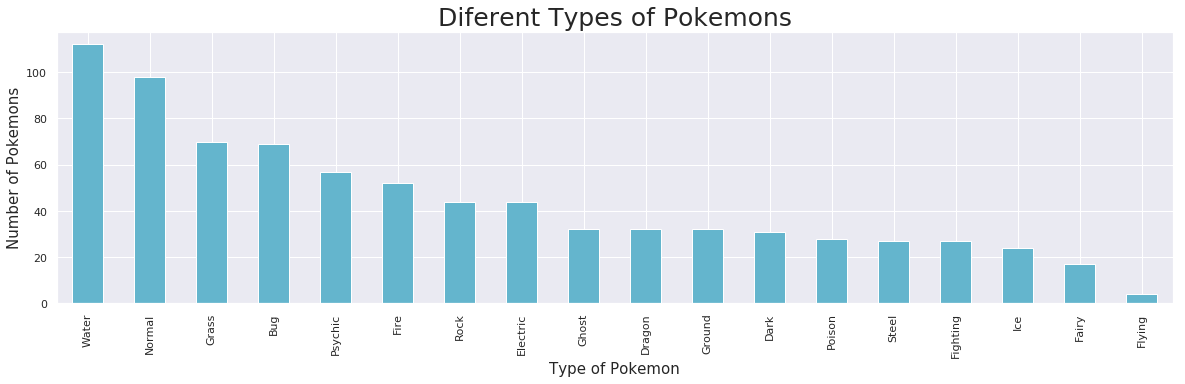

In [150]:
# Number of Pokemons per Types
plt.xlabel('Type of Pokemon', size=size, fontweight=fontweight)
plt.ylabel('Number of Pokemons', size=size, fontweight=fontweight)
plt.title('Diferent Types of Pokemons', size = size_T, fontweight = fontweight_t)
clean_data['Type 1'].value_counts().plot.bar(color='c', figsize = (20, 5))
plt.show()

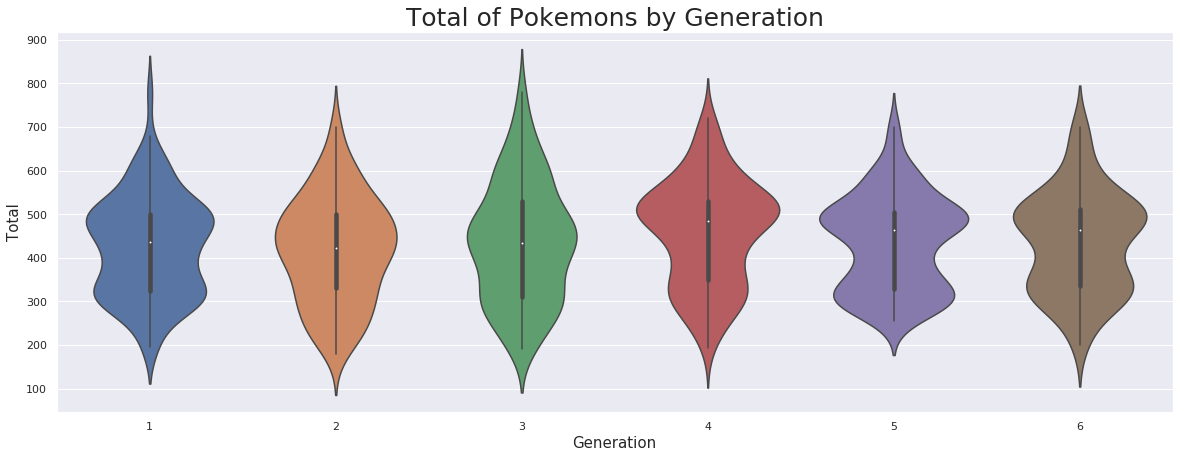

In [156]:
# Violinplot 
# List of the Generation of Pokemons and index
plt.xlabel('Generation', size=size, fontweight=fontweight)
plt.ylabel('Total', size=size, fontweight=fontweight)
plt.title('Total of Pokemons by Generation', size = size_T, fontweight = fontweight_t)
sns.violinplot(x = "Generation", y = "Total",data = clean_data)
sns.set(rc={'figure.figsize':(20,7)})
plt.show()

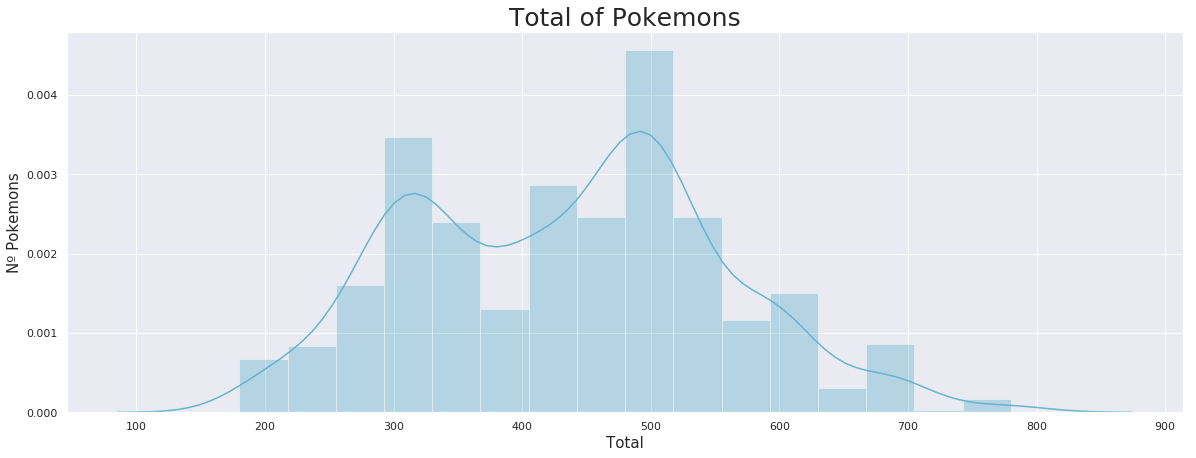

In [164]:
# Distribution of the Total of Pokemons
sns.distplot(clean_data['Total'], color='c')
plt.xlabel('Total', size=size, fontweight=fontweight)
plt.ylabel('Nº Pokemons', size=size, fontweight=fontweight)
plt.title('Total of Pokemons', size = size_T, fontweight = fontweight_t)
sns.set(rc={'figure.figsize':(20,7)})
plt.show()

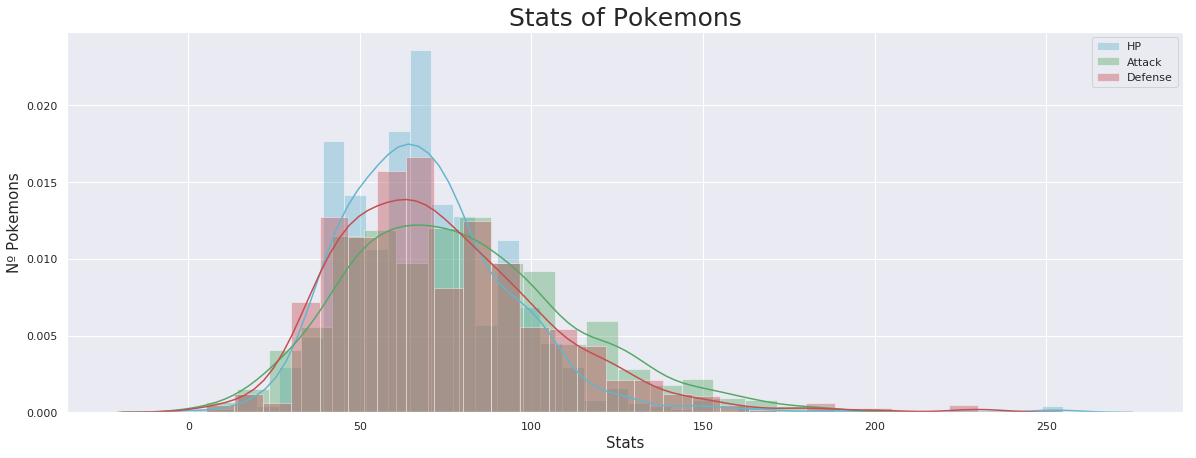

In [199]:
# Distribution of all stats
Stats = ['HP', 'Attack', 'Defense']
color = ['c', 'g', 'r']

sns.distplot(clean_data['HP'], color=color[0])
sns.distplot(clean_data['Attack'], color=color[1])
sns.distplot(clean_data['Defense'], color=color[2])
plt.xlabel('Stats', size=size, fontweight=fontweight)
plt.ylabel('Nº Pokemons', size=size, fontweight=fontweight)
plt.title('Stats of Pokemons', size = size_T, fontweight = fontweight_t)
plt.legend(Stats)
sns.set(rc={'figure.figsize':(20,7)})
plt.show()

In [201]:
# Pokemon Radar COMPLETE
labels=np.array(['HP', 'Attack', 'Defense']


In [230]:
# Dragon vs No Dragon
# Dragon type
dragon_data = clean_data.copy()
dragon_data['Dragon'] = np.where(dragon_data['Type 1']=='Dragon', 'True', 'Flase')

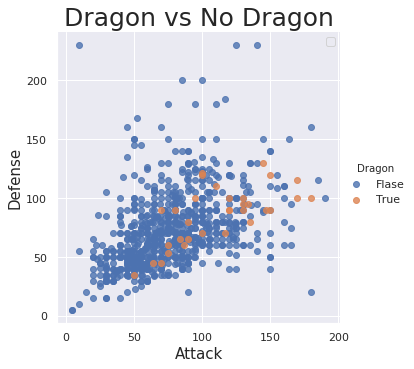

In [233]:
sns.lmplot(x="Attack", y="Defense", hue='Dragon', fit_reg = False, data=dragon_data)
plt.xlabel('Attack', size=size, fontweight=fontweight)
plt.ylabel('Defense', size=size, fontweight=fontweight)
plt.title('Dragon vs No Dragon', size = size_T, fontweight = fontweight_t)
plt.legend(clean_data['Legendary'] == 0, clean_data['Legendary']== 1)
sns.set(rc={'figure.figsize':(20,7)})
plt.show()